# Project 1: What can 5000 TMDb movies dataset tell us?

## Author: Félix Carlos Camacho Criado

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this notebook I will make an analysis of the TMDB Movies dataset downloaded from Kaggle. This dataset contains relevant info about more than 10k movies such as actors, genres, budget, revenue, popularity or rating provided by users. We can also find films from different decades so, I'm sure that the study of the variables and the relationship between them through the time will give us interesting information which cannot be noticeable to the naked eye. Let's go for it!

In [1]:
#First step, it is to set up import statements for all of the packages. In addition to numpys and pandas, 
#I will import packages as matplotlib, seaborn and display_html to plot visualizations.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
import warnings 
warnings.filterwarnings("ignore")

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. First of all, I will load the file and have a look on it. 
 
### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv', encoding = 'utf-8')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's check the structure and shape of the file as well as the data type for each column.

In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Having a look on the columns we can see that not all of them have entries, this suggests there is no data 
for specific columns. For example: "homepage" column. I will also check if there are null values and duplicates rows.

In [6]:
df.isnull().any() #We have null values in each column whose values is True.

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

I will quantify how much null values we have.

In [7]:
df_total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([df_total, percent], axis=1, keys=['Num', 'Percent'])
missing_data.head(10)

,Num,Percent
homepage,7930,0.729799
tagline,2824,0.259893
keywords,1493,0.137401
production_companies,1030,0.094791
cast,76,0.006994
director,44,0.004049
genres,23,0.002117
imdb_id,10,0.000920
overview,4,0.000368
popularity,0,0.000000


Homepage variable is definetely not a good variable as around 72% of entries don't have info about the movie web page.
Now I will check the duplicated rows. So, there is only one duplicated. 

In [8]:
df[df.duplicated()] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
is_duplicated = df.loc[:, 'id'] == 42194
df_dupl = df.loc[is_duplicated]
df_dupl.head() #That's the duplicated row in the dataframe.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Finally, let's take a look on the statistics. This will allow to have a quick view about 
the values of the dataframe for the numerical columns. 

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can see a strange thing regarding 'budget' and 'revenue' variables, as the min and some percentile shows 
0 value and this have no sense, let see how many entries are affected for this situation.

In [11]:
len(df[df['revenue']== 0]) 

6016

In [12]:
len(df[df['budget']== 0])

5696

More than 50% of the entries don't have info about revenue and budget. This is something to consider but I hope
we can still obtain some valuable info with the existing info. I will consider all this findings for the data cleaning phase.

### Data Cleaning phase

Not all columns will be relevant for the future exploratory analysis so, I will remain the variables that 
I'm going to use.

In [13]:
df_movies = df[['id','original_title','budget','revenue','popularity','cast','director','release_year','keywords',
               'genres', 'production_companies','release_date', 'vote_average']]



In [14]:
df_movies.head()

,id,original_title,budget,revenue,popularity,cast,director,release_year,keywords,genres,production_companies,release_date,vote_average
0,135397,Jurassic World,150000000,1513528810,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,2015,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5
1,76341,Mad Max: Fury Road,150000000,378436354,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,2015,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1
2,262500,Insurgent,110000000,295238201,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,2015,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3
3,140607,Star Wars: The Force Awakens,200000000,2068178225,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,2015,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5
4,168259,Furious 7,190000000,1506249360,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,2015,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3


In the previous phase, we have identified a duplicate row, so, I will drop this row.

In [15]:
df_movies = df_movies.drop_duplicates()
df_movies.shape

(10865, 13)

I also identified that more than 50% of revenue and budget values were zero. So as I intend to use this two variables and zero value can affect to future analysis I decided to replace all 0's per NaN.

In [16]:
df_movies['budget'] = df_movies['budget'].replace(0,np.NaN)

In [17]:
df_movies['revenue'] = df_movies['revenue'].replace(0,np.NaN)

In [18]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
id                      10865 non-null int64
original_title          10865 non-null object
budget                  5169 non-null float64
revenue                 4849 non-null float64
popularity              10865 non-null float64
cast                    10789 non-null object
director                10821 non-null object
release_year            10865 non-null int64
keywords                9372 non-null object
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_average            10865 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.2+ MB


I also notice that some movies have NaN values in the budget column but a correct value in the revenue and viceversa. In the exploratory phase I will do some comparison between both variables, and check how much profitable are the movies, I also will work with aggregations...so if I only have the data of one of this variables (budget or revenue) because the other one is NaN, the final results will give biases results, so for the economic analysis and realistic conclusions I think the best idea is not to consider this entries and create a specific dataframe with the valid data to work with economic
info. 

In [19]:
df_movies[(df_movies['budget'].isna()) & (df_movies['revenue'].notna())].head() 
#this is an example of movies with NaN in budget variable and correct info in Revenue column

,id,original_title,budget,revenue,popularity,cast,director,release_year,keywords,genres,production_companies,release_date,vote_average
30,280996,Mr. Holmes,NaN,29355203.0,3.927333,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,2015,london|detective|sherlock holmes,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,6.4
36,339527,Solace,NaN,22354572.0,3.358321,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,2015,thriller|serial killer|psychic|fbi agent|intrigue,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,6.2
72,284289,Beyond the Reach,NaN,45895.0,2.272044,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,2015,desert|hunting,Thriller,Furthur Films,4/17/15,5.5
88,301875,Equals,NaN,2000000.0,1.959765,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,Drake Doremus,2015,illustrator|sex scene|near future|infected|emo...,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,5.6
95,258509,Alvin and the Chipmunks: The Road Chip,NaN,233755553.0,1.841779,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,Walt Becker,2015,chipmunk|cgi|talking animal|aftercreditsstinge...,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,5.7


First, I have identified use cases regarding the values in budget and revenue variables

In [20]:
c1 = len(df_movies[(df_movies['budget'].isna()) & (df_movies['revenue'].isna())])
c2 = len(df_movies[(df_movies['budget'].isna()) & (df_movies['revenue'].notna())])
c3 = len(df_movies[(df_movies['revenue'].isna()) & (df_movies['budget'].notna())])
c4 = len(df_movies[(df_movies['revenue'].notna()) & (df_movies['budget'].notna())])

In [21]:
c1+c2+c3+c4

10865

If a sum up of them, I obtain df_movie dataframe.

In [22]:
df_movies.shape

(10865, 13)

Case 4 does not have any NaN value regarding budget and revenue column so, I will use this dataset for the 
economic analysis.I know the number of records have considerably decreased but it keeps films from each decade and i consider it 
representative enough.

In [23]:
df_budgetrev_c4 = df_movies[(df_movies['revenue'].notna()) & (df_movies['budget'].notna())]

In [24]:
df_budgetrev_c4.shape

(3854, 13)

Budget and Revenue are monetary variables so I also asked myself if they are in the same unit. If we follow the 
description details they unit for this both variables should be USD. I would like to confirm this so I run the next
code.

In [25]:
df_budgetrev_c4.sort_values(by = 'budget').head()

,id,original_title,budget,revenue,popularity,cast,director,release_year,keywords,genres,production_companies,release_date,vote_average
3581,59296,"Love, Wedding, Marriage",1.0,1378.0,0.520430,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,2011,wedding vows|marriage|love,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,5.3
2618,39964,Lost & Found,1.0,100.0,0.090186,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,1999,restaurant|neighbor|dog|ring,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,4/23/99,4.8
8944,14373,Death Wish 2,2.0,16.0,0.464188,Charles Bronson|Jill Ireland|Vincent Gardenia|...,Michael Winner,1982,rape|detective|drug traffic|vigilante|revenge,Action|Crime|Thriller,Cannon Films,2/20/82,5.6
10050,20701,Tales from the Darkside: The Movie,3.0,16.0,0.317091,Rae Dawn Chong|Christian Slater|Deborah Harry|...,John Harrison,1990,anthology|based on tv series|darkside|antholog...,Fantasy|Horror|Comedy,Paramount Pictures|Laurel Productions|Darkside...,5/3/90,5.8
2398,39356,Boy,3.0,43.0,0.028456,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,Taika Waititi,2010,new zealand|maori|farm|goat|duringcreditsstinger,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2/14/10,7.3


Mmm budget of 1 USD? 2 USD? This make no sense to me and I suspect that they are in a different unit
(maybe millions of USD?). After a quick search in TMDB website, I confirm that this is what is happening, therefore I decided to remove
rows with less budget or revenue than 1000,they are not a significant number and I can ensure that most of this films
will be measured in the same unit (USD).

In [26]:
df_budgetrev_c4 = df_budgetrev_c4[(df_budgetrev_c4['budget']>1000) & (df_budgetrev_c4['revenue']>1000)]

In [27]:
len(df_budgetrev_c4)

3819

I have a clean dataframe without NaN and values in the same unit for the questions I will address in the Exploratory Data Analysis which directly use the variables budget and revenue (df_budgetrev_c4).

<a id='eda'></a>
## Exploratory Data Analysis

> Now, I have a first overview and clean data, I'm are ready to move on to exploration. Once I checked the dataframe I have select some concrete questions and topics I found interesting to work with, therefore I will try to answer them based on the data and use visualizations to help me with this task when required. The questions I would like to address are:

<ul>
<li><a href="#corre">What is the correlation between the variables?</a></li>
<li><a href="#hg">Which are highest-grossing films per year?</a></li>
<li><a href="#mov">What were the most profitable movies? And the least profitable?</a></li>
<li><a href="#dir"> Who were the most prolific directors? and the most prolific actors?</a></li>
<li><a href="#tt">What were the trending topics of each decade?</a></li>
<li><a href="#rat">Do user ratings have an influence in the revenue of the movies?</a></li>   


<a id='corre'></a>
### What is the correlation between the variables?

Using the following heatmap I can see how are the variables correlated, it calls my attention the relation between revenue and budget.

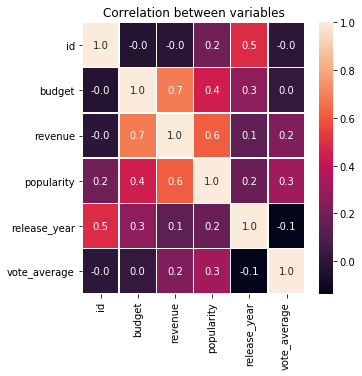

In [28]:
f, ax= plt.subplots(figsize=(5,5))
sns.heatmap(df_budgetrev_c4.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.title('Correlation between variables')
plt.show()

<a id='hg'></a>
### Which are highest-grossing films per year? 

The dataset shows info about movies since 1960 to 2015, I'm curious to know about the film with more revenues per year, lets have a look.

In [29]:
df_film_max = df_budgetrev_c4.loc[df_budgetrev_c4.groupby('release_year')['revenue'].idxmax()]



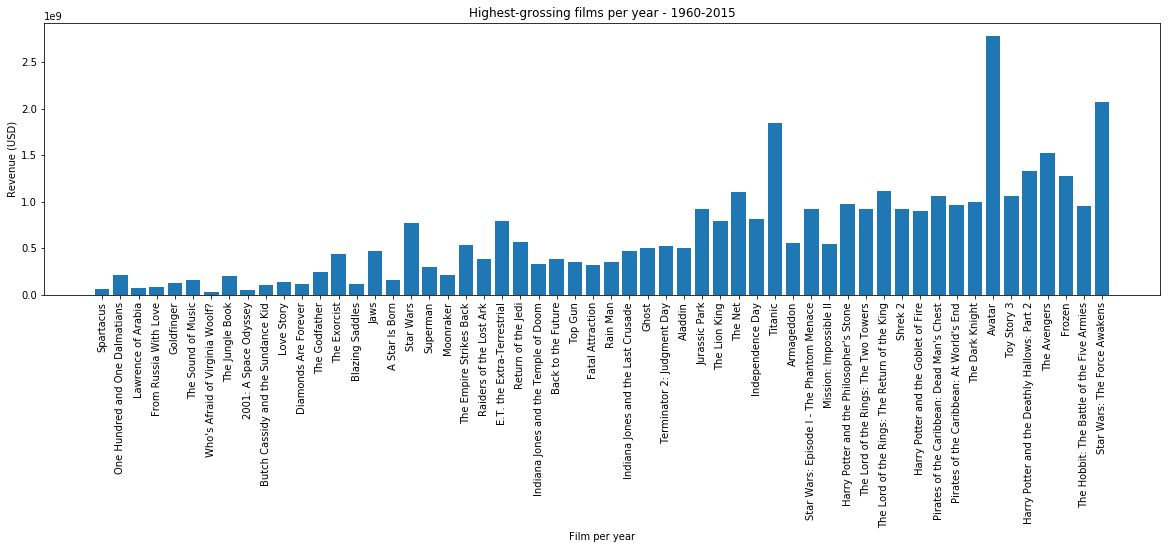

In [30]:
plt.figure(figsize=(20,5))
plt.bar(df_film_max.original_title, df_film_max.revenue)
plt.xticks(df_film_max.original_title, rotation = 90)
plt.xlabel('Film per year')
plt.ylabel('Revenue (USD)')
plt.title('Highest-grossing films per year - 1960-2015')
plt.show()

I can appreciate a clear tendency in the previous graph, the more modern the top movie is, the more revenue collects
with some exceptions like Titanic or Avatar (which were the highest grossing movies of all time). Let's check this
hipothesis using data from the whole dataset. I will support this analysis using the mean and the median.

In [31]:
df_budgetrev_mean = df_budgetrev_c4.groupby(['release_year'])['budget','revenue'].mean()
df_budgetrev_mean['dif'] = df_budgetrev_mean['revenue'] - df_budgetrev_mean['budget']
df_budgetrev_mean['dif_per'] = round((df_budgetrev_mean['dif']/df_budgetrev_mean['budget'])*100,2)

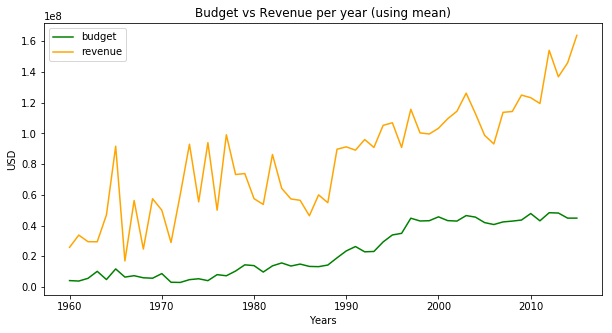

In [32]:
plt.figure(figsize=(10,5))

plt.plot(df_budgetrev_mean.index, df_budgetrev_mean.budget, color='g')
plt.plot(df_budgetrev_mean.index, df_budgetrev_mean.revenue, color='orange')

plt.xlabel('Years')
plt.ylabel('USD')
plt.title('Budget vs Revenue per year (using mean)')
plt.legend()
plt.show()

In [33]:
df_budgetrev_median = df_budgetrev_c4.groupby(['release_year'])['budget','revenue'].median()
df_budgetrev_median['dif'] = df_budgetrev_median['revenue'] - df_budgetrev_median['budget']
df_budgetrev_median['dif_per'] = round((df_budgetrev_median['dif']/df_budgetrev_median['budget'])*100,2)

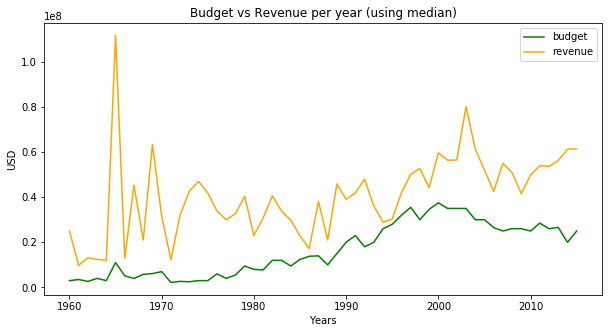

In [34]:
plt.figure(figsize=(10,5))

plt.plot(df_budgetrev_median.index, df_budgetrev_median.budget, color='g')
plt.plot(df_budgetrev_median.index, df_budgetrev_median.revenue, color='orange')

plt.xlabel('Years')
plt.ylabel('USD')
plt.title('Budget vs Revenue per year (using median)')
plt.legend()
plt.show()

By using both statisticals, I think there is a clear tendency about the revenue and how it has increased throught the years
except for the median values of the films released before 1970. The graphs shows some peaks, let see why.

In [40]:
len(df_budgetrev_c4[df_budgetrev_c4['release_year'] <1970])

71

In [41]:
len(df_budgetrev_c4[df_budgetrev_c4['release_year'] >1970])

3737

The reason because of these peaks is the amount of movies released before 1970 is very low comparing with the amount
of movies released after 1970 in our dataset. The more movies per decade the dataset have, the more increase this tendency for the median values.

Let's take a look in the difference between budget and revenues through the decades.

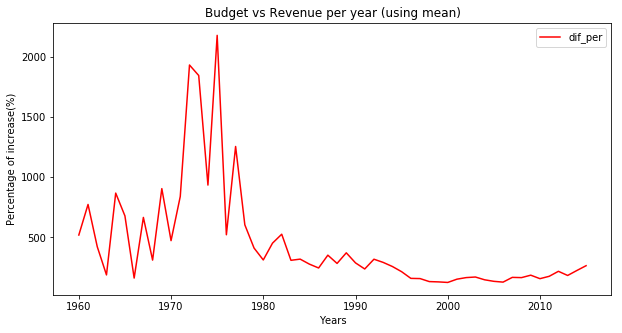

In [44]:

plt.figure(figsize=(10,5))

plt.plot(df_budgetrev_mean.index, df_budgetrev_mean.dif_per, color='r')

plt.xlabel('Years')
plt.ylabel('Percentage of increase(%)')
plt.title('Budget vs Revenue per year (using mean)')
plt.legend()
plt.show()



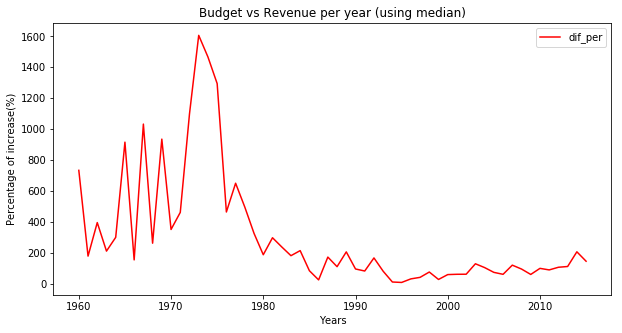

In [45]:

plt.figure(figsize=(10,5))

plt.plot(df_budgetrev_median.index, df_budgetrev_median.dif_per, color='r')

plt.xlabel('Years')
plt.ylabel('Percentage of increase(%)')
plt.title('Budget vs Revenue per year (using median)')
plt.legend()
plt.show()

The graphs show common peaks for the movies between 1970 and 1980. This decade is often called the golden age of Hollywood,
I think now I understand why :)

<a id='mov'></a>
### What were the most profitable movies? And the least profitable?



I will finish the study between revenue, budget and movies checking the most and least profitable movies of the
dataset.

In [46]:
df_rent = df_budgetrev_c4[['original_title','budget','revenue']]

In [47]:
df_rent['Percentage_rent'] = round((((df_rent['revenue']-df_rent['budget'])/df_rent['budget'])*100),2)

In [48]:
df_rent.sort_values('Percentage_rent', ascending = False).head(10)

,original_title,budget,revenue,Percentage_rent
7447,Paranormal Activity,15000.0,193355800.0,1288938.67
2449,The Blair Witch Project,25000.0,248000000.0,991900.00
1354,Eraserhead,10000.0,7000000.0,69900.00
7277,Pink Flamingos,12000.0,6000000.0,49900.00
7178,Super Size Me,65000.0,28575078.0,43861.66
242,The Gallows,100000.0,42664410.0,42564.41
7057,Open Water,130000.0,54667954.0,41952.27
9762,The Texas Chain Saw Massacre,85000.0,30859000.0,36204.71
7827,Mad Max,400000.0,100000000.0,24900.00
10759,Halloween,300000.0,70000000.0,23233.33


In [49]:
df_rent.sort_values('Percentage_rent', ascending = True).head(10)

,original_title,budget,revenue,Percentage_rent
7602,Death Defying Acts,20000000.0,3561.0,-99.98
4611,The Samaritan,12000000.0,2521.0,-99.98
5586,The Adventurer: The Curse of the Midas Box,25000000.0,6399.0,-99.97
5704,Sweetwater,7000000.0,6147.0,-99.91
3573,5 Days of War,20000000.0,17479.0,-99.91
3752,The Good Doctor,6000000.0,5206.0,-99.91
6274,Chaos,12000000.0,10289.0,-99.91
4591,ATM,3000000.0,3010.0,-99.90
5576,Welcome to the Punch,8500000.0,9747.0,-99.89
4859,Foodfight!,65000000.0,73706.0,-99.89


<a id='dir'></a>
### Who were the most prolific directors? and the most prolific actors?

Director and cast columns show the name of people who directed or starred each film but if there is more than one
person this information is separated by the character '|'. In order to count every person I will define a function
which extract the info of every record, so I could apply this function to every wanted column.

In [50]:
def split_top (n, dframe_column):
    split_list = dframe_column.str.cat(sep='|').split('|')
    df_new = pd.DataFrame({'artist' :split_list})
    artist_df = df_new['artist'].value_counts().head(n)
    return artist_df

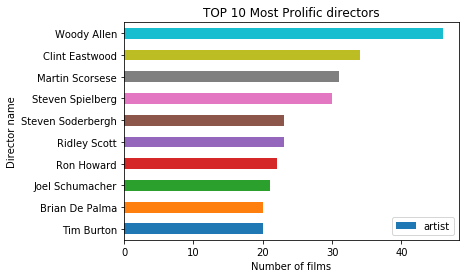

In [51]:
split_top(10, df_movies['director']).sort_values().plot.barh()
plt.title("TOP 10 Most Prolific directors")
plt.xlabel('Number of films')
plt.ylabel('Director name')
plt.legend()
plt.show()

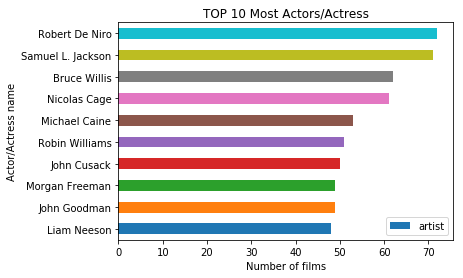

In [52]:
split_top(10, df_movies['cast']).sort_values().plot.barh()
plt.title("TOP 10 Most Actors/Actress")
plt.xlabel('Number of films')
plt.ylabel('Actor/Actress name')
plt.legend()
plt.show()

<a id='tt'></a>
### What were the trending topics of each decade?


We have movies which have been released from 1960 to 2015. So, 55 years of movies which can be grouped by decades,
and taking into consideration the popularity and keywords columns can give us info about which are the trending topics
in the film industry through the years.

In [53]:
#Checking the popularity column values it seems every film have a value, no NaN or zero, but most values are 
#between zero and one.
df_movies['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

In [54]:
#first I will add the decade column based on the info of the release year.
df_movies['decade'] = ((np.floor(df_movies['release_year']/10)*10)).astype('int')

In [55]:
df_movies['decade'].value_counts()

2010    3605
2000    3562
1990    1765
1980    1063
1970     508
1960     362
Name: decade, dtype: int64

I will take the most 300 popular films for each decade, this will be representative enough. So, once I have identified
the most popular films I will take the top 15 keywords.

In [56]:
def top300kw_decade (decade):
    top_decade = df_movies[df_movies['decade'] == decade].sort_values(by = 'popularity', ascending = False).head(300)
    kw_list = top_decade['keywords'].str.cat(sep='|').split('|')
    df_kw = pd.DataFrame({'key' :kw_list})
    df_top = pd.DataFrame({'num': df_kw['key'].value_counts().head(15), 'decade': decade})
    return df_top

In [57]:
top_kw_1960 = top300kw_decade(1960).reset_index()
top_kw_1970 = top300kw_decade(1970).reset_index()
top_kw_1980 = top300kw_decade(1980).reset_index()
top_kw_1990 = top300kw_decade(1990).reset_index()
top_kw_2000 = top300kw_decade(2000).reset_index()
top_kw_2010 = top300kw_decade(2010).reset_index()

In [58]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [59]:
display_side_by_side(top_kw_1960,top_kw_1970, top_kw_1980)

,index,num,decade
0,based on novel,14,1960
1,world war ii,12,1960
2,england,11,1960
3,london,11,1960
4,musical,11,1960
5,cold war,9,1960
6,prison,7,1960
7,epic,7,1960
8,castle,6,1960
9,spy,6,1960


In [60]:
display_side_by_side(top_kw_1990,top_kw_2000, top_kw_2010)

,index,num,decade
0,prison,9,1990
1,corruption,8,1990
2,helicopter,8,1990
3,musical,8,1990
4,brother brother relationship,8,1990
5,undercover,8,1990
6,witch,7,1990
7,new york,7,1990
8,holiday,7,1990
9,dystopia,7,1990


As expected, every decade have a different trending topics for the most popular films of its decade. But, is there any
common trending topic among all decades?

In [61]:
intersection = top_kw_1960.merge(top_kw_1970,on='index').merge(top_kw_1980,on='index').merge(top_kw_1990,on='index').merge(top_kw_2000,on='index').merge(top_kw_2010,on='index')

In [62]:
intersection

,index,num_x,decade_x,num_y,decade_y,num_x,decade_x,num_y,decade_y,num_x,decade_x,num_y,decade_y
0,based on novel,14,1960,15,1970,7,1980,7,1990,16,2000,28,2010


"Based on novel" films it seems to be again on TOP after its decrease of the popularity in the 70s and 80s, anyway, 
films tagged as "based on novel" have been watched and succeed since 1960 till nowadays.

<a id='rat'></a>
### Do user ratings have an influence in the revenue of the movies?


Another question that I would like to address is whether the review given by users have a influence in the revenues and
movies success, in other words, is it more likely than a movie is succesfull if it receives good critics?

In [64]:
df_success = df_budgetrev_c4[df_budgetrev_c4['revenue'] > 1000000] 
#first i will only consider films > 1 million USD of revenues because I consider them as true successfull movies

In [65]:
len(df_success)

3594

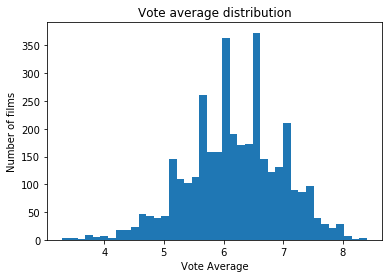

In [66]:
plt.hist('vote_average', data=df_success, bins = 40)
plt.title("Vote average distribution")
plt.xlabel('Vote Average')
plt.ylabel('Number of films')
plt.show()

In [67]:
df_success.vote_average.describe()

count    3594.000000
mean        6.190568
std         0.786196
min         3.300000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

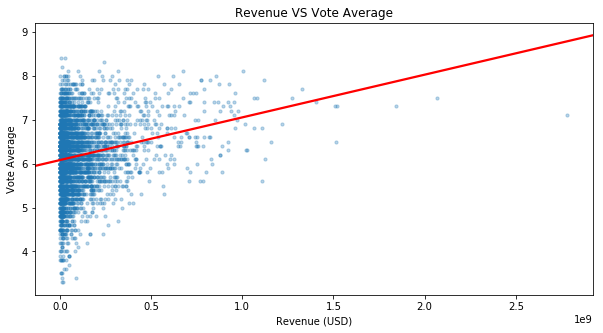

In [68]:
plt.figure(figsize=(10,5))
reg = sns.regplot(x=df_success.revenue, y=df_success.vote_average, data=df_success, ci= None, 
                  marker = 'o',scatter_kws={'s':10, 'alpha': 0.3}, line_kws = {'color': 'red'})
plt.title("Revenue VS Vote Average")
plt.xlabel('Revenue (USD)')
plt.ylabel('Vote Average')
plt.show()

Perfoming a simple linear regression model fit it can be seen how the values of revenue and vote average behave.

In [69]:
df_success[df_success['revenue'] > 325000000].describe()

,id,budget,revenue,popularity,release_year,vote_average
count,306.000000,3.060000e+02,3.060000e+02,306.000000,306.000000,306.000000
mean,40530.728758,1.171083e+08,5.813018e+08,3.665719,2005.437908,6.689216
std,64203.434073,6.430730e+07,2.937228e+08,3.396010,8.409464,0.676913
min,11.000000,5.000000e+06,3.252339e+08,0.142486,1973.000000,5.000000
25%,721.500000,7.000000e+07,3.725642e+08,1.826511,2001.000000,6.200000
50%,9522.500000,1.175000e+08,4.808030e+08,2.915146,2008.000000,6.600000
75%,58589.750000,1.500000e+08,7.075794e+08,4.498025,2012.000000,7.200000
max,417859.000000,3.800000e+08,2.781506e+09,32.985763,2015.000000,8.100000


All movies with a revenues > 350M didn't score less than 5 for vote_average.

<a id='conclusions'></a>
## Conclusions

> After the initial analysis perfomed I found some interesting findings in the 5000 TMDB movies dataset. First of all, 
I would like to remark that despite of seems to be a clean dataset, some columns have problems of completeness and
uniformity. This limitation specially affected to the analysis regarding budget and revenue column anyway, these issues were fixed in the data cleaning steps made along the report.

> There is not a high correlation between the numerical variables but the one between budget and revenue is at least remarkable and this make sense to me as the large scale films are expected have a lot of revenue.

> The evolution of the highest-grossing films per year give us a hint: the modern movies are generating more revenues 
than the old movies, but also more budget was needed to release them. By checking the graphs it can be seen that despite of the films release in the twenty century generate more revenues, the films more rentable were release in the 70s. I also found that 'Paranormal Activity' and 'The Blair Witch Project' were the most profitable films in the dataset, it's incredible how much revenue they have with so little budget!
    
> Regarding directors and actors Woody Allen and Robert De Niro were the most prolific. The Top ten graphs shows a lot
very well known names from directors and actors so considering this and the budget/revenues figures
we can assume that most relevant movies of the industry were including in this dataset. 

> This dataset also give us a great view about how the interest of the audience have changed through the years. If we
take a look in the keywords of the most popular films we can appreciate the differences between decades. In the 60s and 70s we can see that films about world war ii, cold war have a significant presence. The 70s brought also new times, new interests in the society and this is reflect with the presence of the keywords "female nudity",'sex','nudity' or 'male nudity' for this decade. I also found interest how the keywords as 'superhero','artificial intelligence','marvel comic','saving the world' or '3d' have raised in the films of the last two decades. Some of them did not have sense for previous decades and I think that the great special effects have also help them to be more popular. I found curious than the 'based on novel' films have presence in each decade, this kind of movies use to be a success, for sure.

> Finally I was wondering how the good rating by the user have a influence in the success of a film. I am sure that this is not the only factor for success but if you heard good review of a film I think it is more likely you gave it an opportunity and you go to the cinema for watch it. In the graphs we can see that this is true and there is no successful movies which was rated less than 5.00.

<a id='Limitations'></a>
## Limitations

>The dataset in which I worked with include information about more than 10k of movies released between 1960 and 2015. I tried to extract some general conclusions about the whole film industry during these decades but the dataset include a limited number of films, I mean, not all movies recorded during these years were included in the dataset. Fortunately, i think that the films included represents most of the most relevant films so, it is a good and smart sample of the 
whole population.

>There are also a few consideration about the number of movies per decade. The number of movies released before 1980 (8%) have a considerably reduced number than the films released after 1980 (92%). This have some effects in the analysis and visualizations but this effect have been considered and explained in the respective visualization. In addition, the most updated date for release year column in 2015 so, 2010s decade is not complete in contrast with the
previous decades.

>Regarding the columns budget and revenue, the original dataset include a lot of missing values, in addition, some records include invalid values in the budget column but a correct value in the revenue and viceversa or maybe are measured in a different unit. Therefore, only 3854 movies (35%) are considered as valid to draw conclusions which include revenue and budget variables. 

>Other analysis and conclusions drawn which don't include economic variables such as the trending topic per decades or
the most prolific actors or director include the whole dataset as the rest of the columns don't present this problem
and the more movies I consider the better and accurate answer I can give to the question I submit.

>I assume that the cast column in also limited, so it doesn't include all the complete cast but at least include the most
relevant actor and actress who participated in each film.

>In order to answer to the question "What were the trending topics of each decade?", I choose to consider the 300 top
more popular movies because I thought it was a representative enough sample for each decade. This was a common rule for each decade in order to have some consistency in the results but we will probably have different results (at least in the order of the trending topics) if I had choosen a less or bigger number of popular movies.

>To conclude, I would like to add that the popularity and user rating values are based in the TMDB data and the number of votes received using this platform sometime, so I understand that this number can vary depend on the time of extraction.
